In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
datos = pd.read_csv("data/articulos_ml.csv")

In [ ]:
columnas_numericas = ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days', '# Shares']
df = datos[columnas_numericas].copy()
df.fillna(0, inplace=True)

X = df.drop('# Shares', axis=1)
y = df['# Shares']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred_modelo = modelo.predict(X_test)

r2_modelo = r2_score(y_test, y_pred_modelo)
rmse_modelo = np.sqrt(mean_squared_error(y_test, y_pred_modelo))
score_modelo = modelo.score(X_test, y_test)  # Score del modelo

#print("LinearRegression sin escalado -> R²:", r2_modelo, ", RMSE:", rmse_modelo, ", Score:", score_modelo)
#print("Hiperparámetros:", modelo.get_params())
print("Resultados del Modelo Sin Escalado")
print("R²:", r2_modelo)
print("RMSE:", rmse_modelo)
print("Score:", score_modelo)
print("Hiperparámetros: ", modelo.get_params())

Resultados del Modelo Sin Escalado
R²: -0.8222444400335363
RMSE: 26257.121644630857
Score: -0.8222444400335363
Hiperparámetros:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [ ]:
modelo_scaled = LinearRegression()
modelo_scaled.fit(X_train_scaled, y_train)
y_pred_modelo_scaled = modelo_scaled.predict(X_test_scaled)

r2_modelo_scaled = r2_score(y_test, y_pred_modelo_scaled)
rmse_modelo_scaled = np.sqrt(mean_squared_error(y_test, y_pred_modelo_scaled))
score_modelo_scaled = modelo_scaled.score(X_test_scaled, y_test)

print("Resultados del Modelo Escalado")
print("R²:", r2_modelo_scaled)
print("RMSE:", rmse_modelo_scaled)
print("Score:", score_modelo_scaled)
print("Hiperparámetros:", modelo_scaled.get_params())

Resultados del Modelo Escalado
R²: -0.8222444400335351
RMSE: 26257.12164463085
Score: -0.8222444400335351
Hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [ ]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 50, 100]}
modelo_ridge = Ridge()
grid = GridSearchCV(modelo_ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)
mejor_modelo_ridge = grid.best_estimator_

y_pred_modelo_ridge = mejor_modelo_ridge.predict(X_test_scaled)
r2_modelo_ridge = r2_score(y_test, y_pred_modelo_ridge)
rmse_modelo_ridge = np.sqrt(mean_squared_error(y_test, y_pred_modelo_ridge))
score_modelo_ridge = mejor_modelo_ridge.score(X_test_scaled, y_test)

print("Resultados de Modelo Optimizado")
print("R²:", r2_modelo_ridge)
print("RMSE:", rmse_modelo_ridge)
print("Score:", score_modelo_ridge)
print("Mejor alpha Ridge:", grid.best_params_)

Resultados de Modelo Optimizado
R²: -0.5399354111507773
RMSE: 24137.653697043752
Score: -0.5399354111507773
Mejor alpha Ridge: {'alpha': 100}


In [ ]:
metrics = {
    "modelo": ["Modelo no escalado", "Modelo escalado", "Modelo Optimizado"],
    "r2": [r2_modelo, r2_modelo_scaled, r2_modelo_ridge],
    "rmse": [rmse_modelo, rmse_modelo_scaled, rmse_modelo_ridge],
    "score": [score_modelo, score_modelo_scaled, score_modelo_ridge]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

               modelo        r2          rmse     score
0  Modelo no escalado -0.822244  26257.121645 -0.822244
1     Modelo escalado -0.822244  26257.121645 -0.822244
2   Modelo Optimizado -0.539935  24137.653697 -0.539935


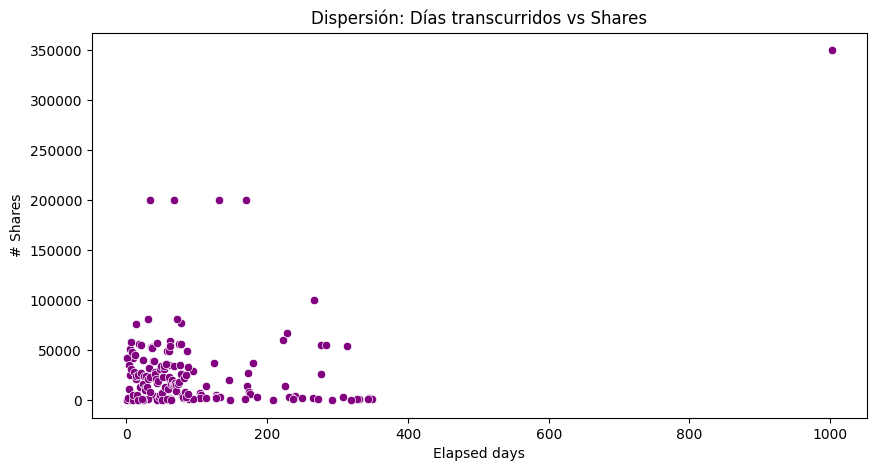

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Elapsed days'], y=df['# Shares'], color="purple")
plt.title("Dispersión: Días transcurridos vs Shares")
plt.xlabel("Elapsed days")
plt.ylabel("# Shares")
plt.show()

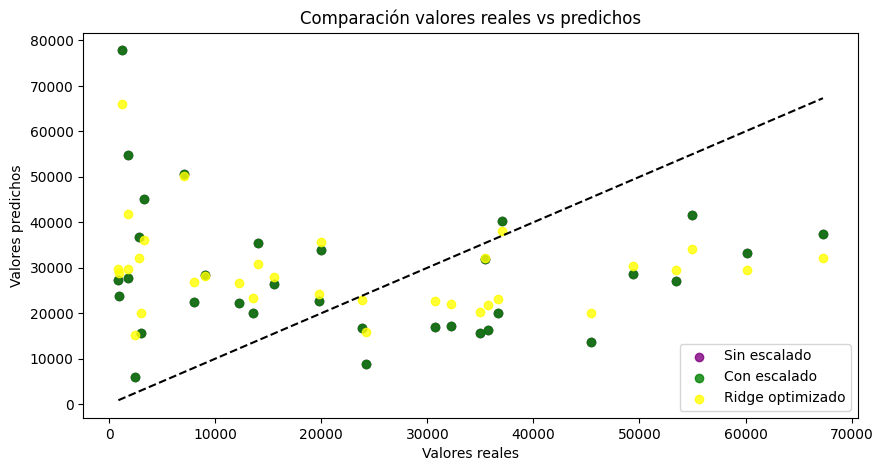

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_modelo, color="purple", alpha=0.8, label='Sin escalado')
plt.scatter(y_test, y_pred_modelo_scaled, color="green", alpha=0.8, label='Con escalado')
plt.scatter(y_test, y_pred_modelo_ridge, color="yellow", alpha=0.8, label='Ridge optimizado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Comparación valores reales vs predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.legend()
plt.show()